# Name : Aditya Mishra
# College : IIT Kanpur

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Input, Dropout, Lambda
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.xception import Xception
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from glob import glob

Creating an object of Xception class, with its original weights used in imagenet challenge. Excluding the last layer from its architecture.

In [4]:
conv_base = Xception(weights='imagenet',include_top = False,input_shape=(256,256,3))

83683744/83683744 [==============================] - 0s 0us/step


Freezing the weights in conv_base therefore we won't train those weights

In [5]:
conv_base.trainable = False

Creating a sequential model with conv_base layers and 2 dense layers including the ouput layer

In [12]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Importing the images from train folder, applying data augmentation and creating train and validation datasets.

In [13]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,    #Normalozing the pixel values using min-max scaling
#                              shear_range=0.2,   # Shear the image by up to 20%
#                              zoom_range=0.2,    # Zoom in or out on the image by up to 20%
#                              horizontal_flip=True, # Flip the image horizontally
                             validation_split = 0.2)

# Load images from directory
directory = '/kaggle/input/crack-detection-image-classification-2023/train'
batch_size = 32
img_height = 256
img_width = 256

train_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset = 'training')

test_generator = datagen.flow_from_directory(
        directory,
        target_size = (img_height, img_width),
        batch_size = batch_size,
        class_mode = 'binary',
        subset = 'validation')

Found 11975 images belonging to 2 classes.
Found 2993 images belonging to 2 classes.


In [14]:
for x_batch, y_batch in train_generator:
    print(x_batch.shape)
    print(y_batch.shape)
    break

(32, 256, 256, 3)
(32,)


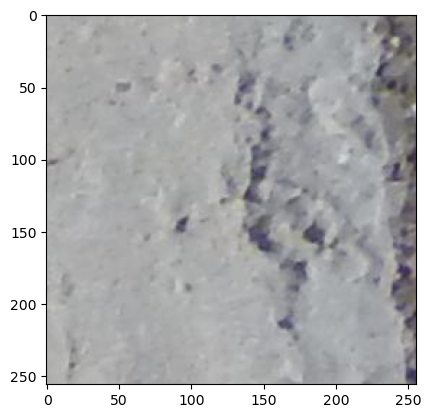

In [15]:
import random
idx = random.randint(0, len(y_batch))
plt.imshow(x_batch[idx, :])
#plt.show()

In [16]:
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
375/375 [==============================] - 90s 231ms/step - loss: 0.5404 - accuracy: 0.7442 - val_loss: 0.4833 - val_accuracy: 0.7665
Epoch 2/10
375/375 [==============================] - 85s 227ms/step - loss: 0.4122 - accuracy: 0.8058 - val_loss: 0.4205 - val_accuracy: 0.8079
Epoch 3/10
375/375 [==============================] - 85s 228ms/step - loss: 0.3507 - accuracy: 0.8377 - val_loss: 0.4465 - val_accuracy: 0.7932
Epoch 4/10
375/375 [==============================] - 85s 227ms/step - loss: 0.3035 - accuracy: 0.8645 - val_loss: 0.5002 - val_accuracy: 0.7912
Epoch 5/10
375/375 [==============================] - 85s 228ms/step - loss: 0.2659 - accuracy: 0.8848 - val_loss: 0.4983 - val_accuracy: 0.7995
Epoch 6/10
375/375 [==============================] - 85s 228ms/step - loss: 0.2215 - accuracy: 0.9020 - val_loss: 0.5333 - val_accuracy: 0.7922
Epoch 7/10
375/375 [==============================] - 85s 228ms/step - loss: 0.1967 - accuracy: 0.9166 - val_loss: 0.6003 - val_ac

In [18]:
conv_base.trainable = True

In [19]:
#model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
375/375 [==============================] - 86s 230ms/step - loss: 0.0972 - accuracy: 0.9643 - val_loss: 0.8219 - val_accuracy: 0.7885
Epoch 2/10
375/375 [==============================] - 85s 227ms/step - loss: 0.1100 - accuracy: 0.9642 - val_loss: 0.7971 - val_accuracy: 0.7868
Epoch 3/10
375/375 [==============================] - 89s 238ms/step - loss: 0.0758 - accuracy: 0.9722 - val_loss: 0.8911 - val_accuracy: 0.7979
Epoch 4/10
375/375 [==============================] - 85s 227ms/step - loss: 0.0400 - accuracy: 0.9888 - val_loss: 0.8589 - val_accuracy: 0.7989
Epoch 5/10
375/375 [==============================] - 86s 228ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 0.9737 - val_accuracy: 0.7905
Epoch 6/10
375/375 [==============================] - 85s 227ms/step - loss: 0.0251 - accuracy: 0.9927 - val_loss: 1.0338 - val_accuracy: 0.7908
Epoch 7/10
375/375 [==============================] - 85s 228ms/step - loss: 0.0650 - accuracy: 0.9785 - val_loss: 1.1923 - val_ac

In [21]:
import os
import tensorflow as tf
test_path = '/kaggle/input/crack-detection-image-classification-2023/test'
#test_filenames = os.listdir(test_path)

              
              
test_predictions = np.array([])
test_labels=[]

for img in os.listdir(test_path):
    image_path = os.path.join(test_path,img)
    image_path
    image = tf.keras.utils.load_img(image_path, target_size = (256,256))
    image = tf.keras.utils.img_to_array(image)
    image = np.array([image])
    image = image/255
    predictions = np.squeeze((model.predict(image) >= 0.5))
    test_predictions = np.append(test_predictions, predictions)
    if predictions==1:
        test_labels.append("uncracked")
    elif predictions==0:
        test_labels.append("cracked")
#         break
#print(test_predictions)

1/1 [==============================] - 0s 29ms/step


In [ ]:
import pandas as pd
# FINAL OUTPUT CREATION FOR KAGGLE SUBMISSION
filename=os.listdir('/kaggle/input/crack-detection-image-classification-2023/test')

data = pd.DataFrame({'filename':filename,'class':test_labels})
# data['class']=data['class'].apply(str)
# data
# data['class']=data['class'].str.replace('0.0','cracked')
# data['class']=data['class'].str.replace('1.0','uncracked')
data.to_csv('/kaggle/working/output2_assg2.csv')